In [9]:
# Question: Why x / 400 ?
# Question: Why do we do not use multiple gradient step / line search or stuff like that ?
# Question: Why to choose a modify logistic function

# `ELO`

Consider two players $A$ and $B$. Let their current skill levels be represented by ratings $R_A$ and $R_B$. 

When players $A$ and $B$ play, we suppose that the outcome of a match is modeled probabilistically:

$$
P(\mathrm{A} \text { beats } \mathrm{B})=\sigma\left(R_A-R_B\right)
$$

where $\sigma(x)$ is the (slighly modified) logistic function:

$$
\sigma(x)=\frac{1}{1+10^{-x / 400}}
$$

Define outcome $S_A$ :
- $S_A=1$ if player $A$ wins.
- $S_A=0$ if player $A$ loses.

The likelihood of outcome $S_A$ given skills $R_A$ and $R_B$ is:

$$
P\left(S_A \mid R_A, R_B\right)=\sigma\left(R_A-R_B\right)^{S_A}\left[1-\sigma\left(R_A-R_B\right)\right]^{1-S_A}
$$

Consider the log-likelihood:

$$
L\left(R_A\right)=S_A \log \left(\sigma\left(R_A-R_B\right)\right)+\left(1-S_A\right) \log \left[1-\sigma\left(R_A-R_B\right)\right]
$$

We can imagine a system where to update our belief of $R_A$ based on the following update rule:

$$
R_A^{\mathrm{new}} \approx R_A^{\mathrm{old}}+\alpha \frac{\partial L\left(R_A\right)}{\partial R_A}
$$

with a suitable learning rate $\alpha$.

This update rule is similar to a gradient step in the direction of the maximal increase of the log-likelihood.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigma(x):
    """
    Compute the modified logistic function: σ(x) = 1 / (1 + 10^(-x/400))
    
    Parameters:
    -----------
    x : float or numpy.ndarray
        The input value or array
        
    Returns:
    --------
    float or numpy.ndarray
        The result of applying the modified logistic function
    """
    return 1 / (1 + 10**(-x / 400))


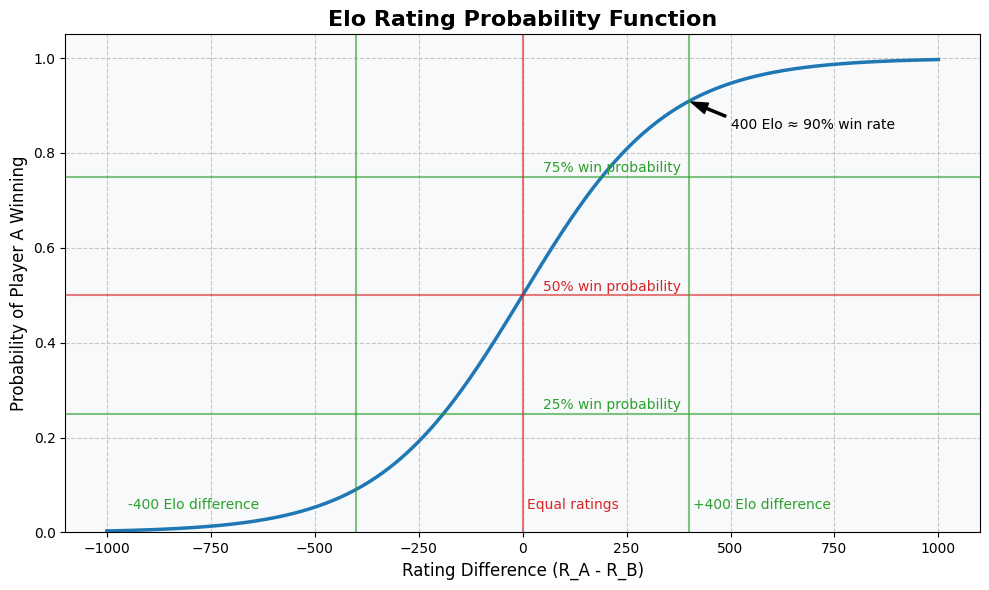

In [8]:
# Plot the sigma function over a sensible range
# Define a range of values for x (skill difference)
x_values = np.linspace(-1000, 1000, 1000)
y_values = sigma(x_values)

# Create a figure with improved styling
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linewidth=2.5, color='#1f77b4')

# Improve title and labels with better fonts
plt.title('Elo Rating Probability Function', fontsize=16, fontweight='bold')
plt.xlabel('Rating Difference (R_A - R_B)', fontsize=12)
plt.ylabel('Probability of Player A Winning', fontsize=12)

# Add a grid with better styling
plt.grid(True, linestyle='--', alpha=0.7)

# Add reference lines with improved styling and annotations
# Horizontal probability lines
plt.axhline(y=0.5, color='#d62728', linestyle='-', alpha=0.6, linewidth=1.5)
plt.axhline(y=0.25, color='#2ca02c', linestyle='-', alpha=0.6, linewidth=1.5)
plt.axhline(y=0.75, color='#2ca02c', linestyle='-', alpha=0.6, linewidth=1.5)

# Vertical Elo difference lines
plt.axvline(x=0, color='#d62728', linestyle='-', alpha=0.6, linewidth=1.5)
plt.axvline(x=-400, color='#2ca02c', linestyle='-', alpha=0.6, linewidth=1.5)
plt.axvline(x=400, color='#2ca02c', linestyle='-', alpha=0.6, linewidth=1.5)

# Add text annotations instead of using a legend
plt.text(50, 0.51, "50% win probability", fontsize=10, color='#d62728')
plt.text(50, 0.76, "75% win probability", fontsize=10, color='#2ca02c')
plt.text(50, 0.26, "25% win probability", fontsize=10, color='#2ca02c')
plt.text(-950, 0.05, "-400 Elo difference", fontsize=10, color='#2ca02c')
plt.text(410, 0.05, "+400 Elo difference", fontsize=10, color='#2ca02c')
plt.text(10, 0.05, "Equal ratings", fontsize=10, color='#d62728')

# Add annotations for key points
plt.annotate('400 Elo ≈ 90% win rate', xy=(400, sigma(400)), xytext=(500, 0.85),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8), 
             fontsize=10)

# Set y-axis limits for better visualization
plt.ylim(0, 1.05)

# Add a subtle background color
plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()


Let's compute the gradient explicitly. First, recall:

$$
\frac{d}{d x} \sigma(x)=\sigma(x)(1-\sigma(x)) \frac{\log (10)}{400}
$$


Then the gradient becomes:

$$
\frac{\partial L\left(R_A\right)}{\partial R_A}=\frac{S_A-\sigma\left(R_A-R_B\right)}{\sigma\left(R_A-R_B\right)\left[1-\sigma\left(R_A-R_B\right)\right]} \cdot \sigma\left(R_A-R_B\right)\left(1-\sigma\left(R_A-R_B\right)\right) \frac{\log (10)}{400}
$$


Simplifying, we have:

$$
\frac{\partial L\left(R_A\right)}{\partial R_A}=\left(S_A-\sigma\left(R_A-R_B\right)\right) \frac{\log (10)}{400}
$$


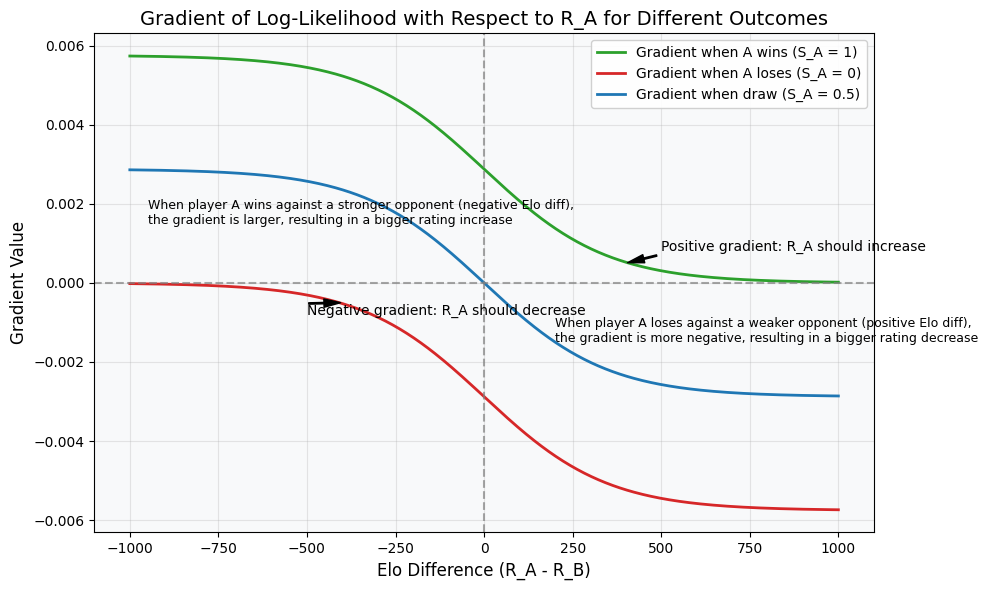

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigma(x):
    return 1.0 / (1.0 + 10.0 ** (-x / 400.0))

# Define the gradient function
def gradient(R_A, R_B, S_A):
    return (S_A - sigma(R_A - R_B)) * (np.log(10) / 400)

# Create a range of Elo differences
elo_diff = np.linspace(-1000, 1000, 500)

# Calculate gradients for different outcomes
gradient_win = [gradient(diff, 0, 1) for diff in elo_diff]    # S_A = 1 (A wins)
gradient_loss = [gradient(diff, 0, 0) for diff in elo_diff]   # S_A = 0 (A loses)
gradient_draw = [gradient(diff, 0, 0.5) for diff in elo_diff] # S_A = 0.5 (draw)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the gradients
plt.plot(elo_diff, gradient_win, label='Gradient when A wins (S_A = 1)', color='#2ca02c', linewidth=2)
plt.plot(elo_diff, gradient_loss, label='Gradient when A loses (S_A = 0)', color='#d62728', linewidth=2)
plt.plot(elo_diff, gradient_draw, label='Gradient when draw (S_A = 0.5)', color='#1f77b4', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
# Add a vertical line at x=0
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Elo Difference (R_A - R_B)', fontsize=12)
plt.ylabel('Gradient Value', fontsize=12)
plt.title('Gradient of Log-Likelihood with Respect to R_A for Different Outcomes', fontsize=14)

# Add annotations
plt.annotate('Positive gradient: R_A should increase', xy=(400, 0.0005), xytext=(500, 0.0008),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), fontsize=10)
plt.annotate('Negative gradient: R_A should decrease', xy=(-400, -0.0005), xytext=(-500, -0.0008),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6), fontsize=10)

# Add text explaining the gradient behavior
plt.text(-950, 0.0015, "When player A wins against a stronger opponent (negative Elo diff),\nthe gradient is larger, resulting in a bigger rating increase", fontsize=9)
plt.text(200, -0.0015, "When player A loses against a weaker opponent (positive Elo diff),\nthe gradient is more negative, resulting in a bigger rating decrease", fontsize=9)

plt.legend(loc='upper right', frameon=True, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.gca().set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()


Thus, the Bayesian gradient update simplifies neatly to:

$$
R_A^{\text {new }}=R_A^{\text {old }}+K\left(S_A-\sigma\left(R_A-R_B\right)\right)
$$

with:

$$
K=\alpha \frac{\log (10)}{400}
$$


This is exactly the classical Elo rating update rule:

$$
\boxed{R_A^{\mathrm{new}}=R_A^{\mathrm{old}}+K\left(S_A-E_A\right), \quad \text { where } \quad E_A=\frac{1}{1+10^{\left(R_B-R_A\right) / 400}}}
$$
